# Predicting the House Market from Ames, Iowa

The goal is to use Machine Learning techniques to predict house prices based on 81 different features

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer # fix missing values
from sklearn.preprocessing import LabelEncoder #convert to numbers
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #suppress the Pandas feature warning
import os 
from scipy import stats
from scipy.stats import skew, norm
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

from sklearn.linear_model import ElasticNet
import inspect


from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.models import Model
from keras.layers import Input
from sklearn.model_selection import KFold, StratifiedKFold
from keras.optimizers import SGD

import statistics

from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import math

import xgboost as xgb
import itertools

pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)

In [2] is your computers working directory path, change to directory the data is downloaded to

In [2]:
# Google Drive loading & Kaggle loading 
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = "/content/gdrive/My Drive/Machine Learning 9039"

Mounted at /content/gdrive


# Import

In [3]:
df = pd.read_csv(base_dir+'/Dataset/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv(base_dir+'/Dataset/house-prices-advanced-regression-techniques/test.csv')

In [4]:
print(df.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [5]:
#keep a copy of original dataframe
original_df = df.copy()
originaltest_df = df_test.copy()
original_df_test = originaltest_df

# Data Exploration

##General exploration

In any machine learning project, the first step is to get familiar with the data. 

In [6]:
# find number of rows and columns
shape = df.shape 
print(shape) 

(1460, 81)


In [7]:
#display the first 10 rows of training data
df.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7         Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   
5       Norm     1Fam     1.5Fin            5            5       1993   
6       Norm     1Fam     1Story            8            5       2004   
7       Norm     1Fam     2Story            7            6       1973   
8       Norm     1Fam     1.5Fin            7            5       1931   
9     Artery   2fmCon     1.5Unf            5            6       1939   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5          1995     Gable  CompShg     VinylSd     VinylSd       None   
6          2005     Gable  CompShg     VinylSd     VinylSd      Stone   
7          1973     Gable  CompShg     HdBoard     HdBoard      Stone   
8          1950     Gable  CompShg     BrkFace     Wd Shng       None   
9          1950     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   
5         0.0        TA        TA       Wood       Gd       TA           No   
6       186.0        Gd        TA      PConc       Ex       TA           Av   
7       240.0        TA        TA     CBlock       Gd       TA           Mn   
8         0.0        TA        TA     BrkTil       TA       TA           No   
9       

The above code shows the datas first 10 instances and their corresponding value for each column

In [8]:
df_test.shape

(1459, 80)

In [9]:
#display the first 10 rows of testing data
df_test.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   
5  1466          60       RL         75.0    10000   Pave   NaN      IR1   
6  1467          20       RL          NaN     7980   Pave   NaN      IR1   
7  1468          60       RL         63.0     8402   Pave   NaN      IR1   
8  1469          20       RL         85.0    10176   Pave   NaN      Reg   
9  1470          20       RL         70.0     8400   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   
5         Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
6         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
7         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
8         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
9         Lvl    AllPub    Corner       Gtl        NAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   
5       Norm     1Fam     2Story            6            5       1993   
6       Norm     1Fam     1Story            6            7       1992   
7       Norm     1Fam     2Story            6            5       1998   
8       Norm     1Fam     1Story            7            5       1990   
9       Norm     1Fam     1Story            4            5       1970   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   
5          1994     Gable  CompShg     HdBoard     HdBoard       None   
6          2007     Gable  CompShg     HdBoard     HdBoard       None   
7          1998     Gable  CompShg     VinylSd     VinylSd       None   
8          1990     Gable  CompShg     HdBoard     HdBoard       None   
9          1970     Gable  CompShg     Plywood     Plywood       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   
5         0.0        TA        TA      PConc       Gd       TA           No   
6         0.0        TA        Gd      PConc       Gd       TA           No   
7         0.0        TA        TA      PConc       Gd       TA           No   
8         0.0        TA        TA      PConc       Gd       TA     

In [10]:
#training data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

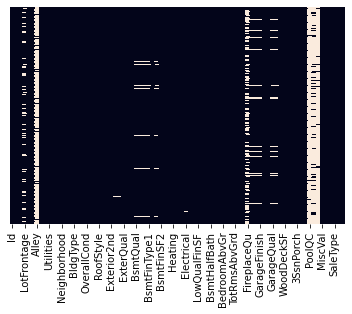

In [11]:
# See Null Values through Heat Map 
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [12]:
#Check Null Values 
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [13]:
#print missing values in percentage
df_na=[feat for feat in df.columns if df[feat].isnull().sum()>1]

for feat in df_na:
    print(feat, np.round(df[feat].isnull().mean(), 3)*100,'% percentage of values missing')

LotFrontage 17.7 % percentage of values missing
Alley 93.8 % percentage of values missing
MasVnrType 0.5 % percentage of values missing
MasVnrArea 0.5 % percentage of values missing
BsmtQual 2.5 % percentage of values missing
BsmtCond 2.5 % percentage of values missing
BsmtExposure 2.6 % percentage of values missing
BsmtFinType1 2.5 % percentage of values missing
BsmtFinType2 2.6 % percentage of values missing
FireplaceQu 47.3 % percentage of values missing
GarageType 5.5 % percentage of values missing
GarageYrBlt 5.5 % percentage of values missing
GarageFinish 5.5 % percentage of values missing
GarageQual 5.5 % percentage of values missing
GarageCond 5.5 % percentage of values missing
PoolQC 99.5 % percentage of values missing
Fence 80.80000000000001 % percentage of values missing
MiscFeature 96.3 % percentage of values missing


The missing values need to be treated later on in the data cleaning and 
preprocessing part. Features either need fill in or removed

## Familiarization with Target Variable


In [14]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

There is no missing values for the target variable "SalePrice", and The generated descriptive statistics tells it does not contain any invalid value or non-numerical value. Let's do some more advanced analysis.

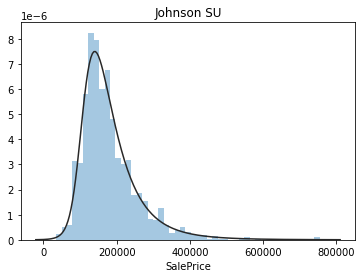

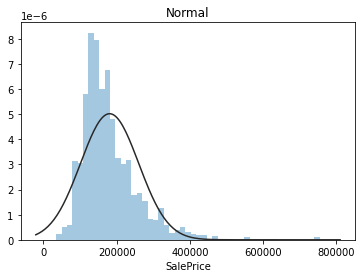

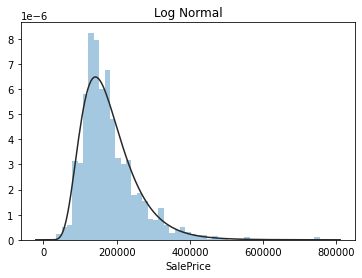

In [15]:
# normal distribution check
y = df['SalePrice']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=stats.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)

-Skewness: is a measure of symmetry. A distribution, or dataset, is symmetric if it looks the same to the left and right of the center point. 

-Kurtosis: is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. High kurtosis tend to have heavy tails, or outliers. 

In [16]:
#Skewness and Kurtosis check 
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


based on the graph and numerical values we conclude that:
1. The data are highly skewed, and more percisely, it is skewed right (the right tail is longer)
2. The distribution has heavier tails

Solutions: Need some transformation, For example, the Johnson or Log transformation. Using either of these transformations will produce similar results as both have pretty accurate fits to their respective curves. We will normalize using the Johnson SU normalization

Text(0.5, 1.0, 'House Price vs YearSold')

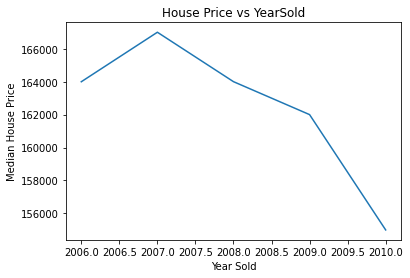

In [17]:
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

The house Price vs Year sold graph shows the average price of properties sold by year sold. Resolution to the half year through linear interpolation, but the big finding from this is the prices peaked in 2007. Knowing there was a huge economic crash in 2008 in the USA could be the cause of this. 


## Familiarization with Features

Let's first create a correlation matrix for numerical features

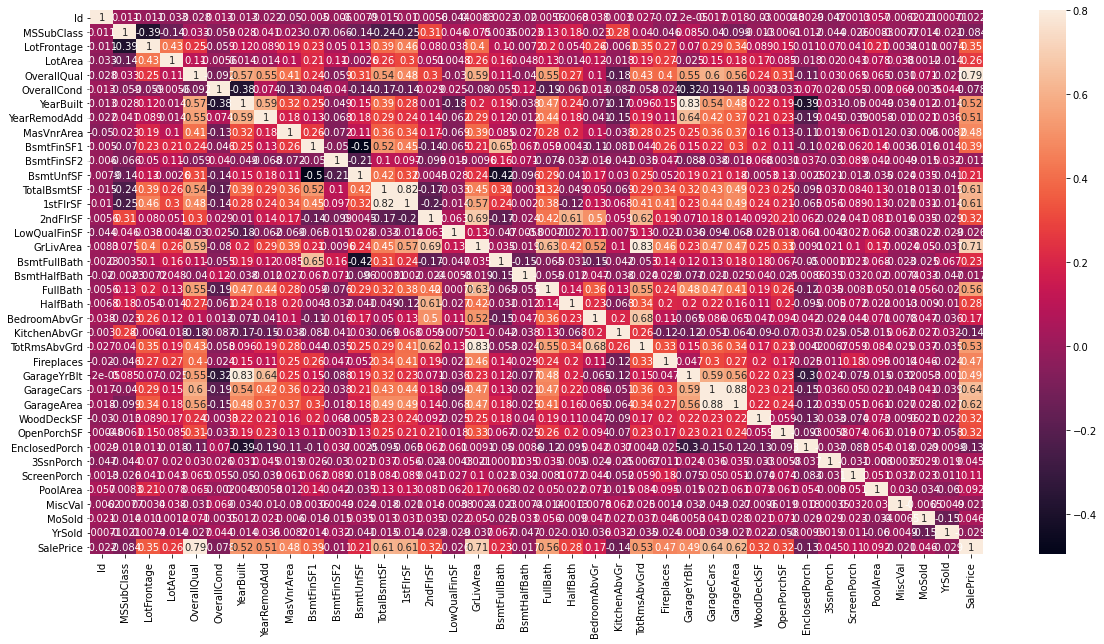

In [18]:
cormat = df.corr()
f,ax = plt.subplots(figsize=(20,10))
sns.heatmap(cormat, vmax=.8, annot=True)

let's explore those most correlated features

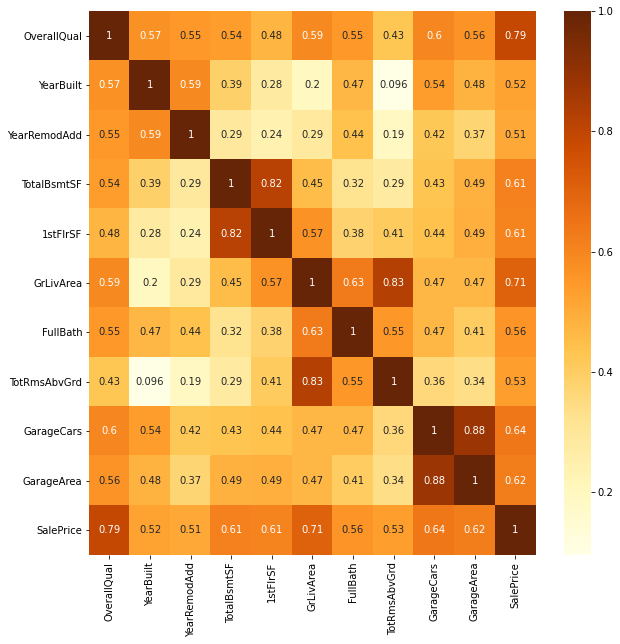

In [19]:
cormat = df.corr()
most_correlated_features = cormat.index[abs(cormat["SalePrice"])> 0.5]
plt.figure(figsize=(10,10))
graph = sns.heatmap(df[most_correlated_features].corr(), annot=True, cmap="YlOrBr")

Some features are highly correlated with each others. For example:


*   1stFirSF and TotalBsmtSF
*   TotRmsAbvGrd and GrLivArea
*   GarageArea and GarageCars

Furthermore, the OverallQual is highly correlated to our target variable: SalePrice





Now, let's see how those features are correlated to SalePrice.

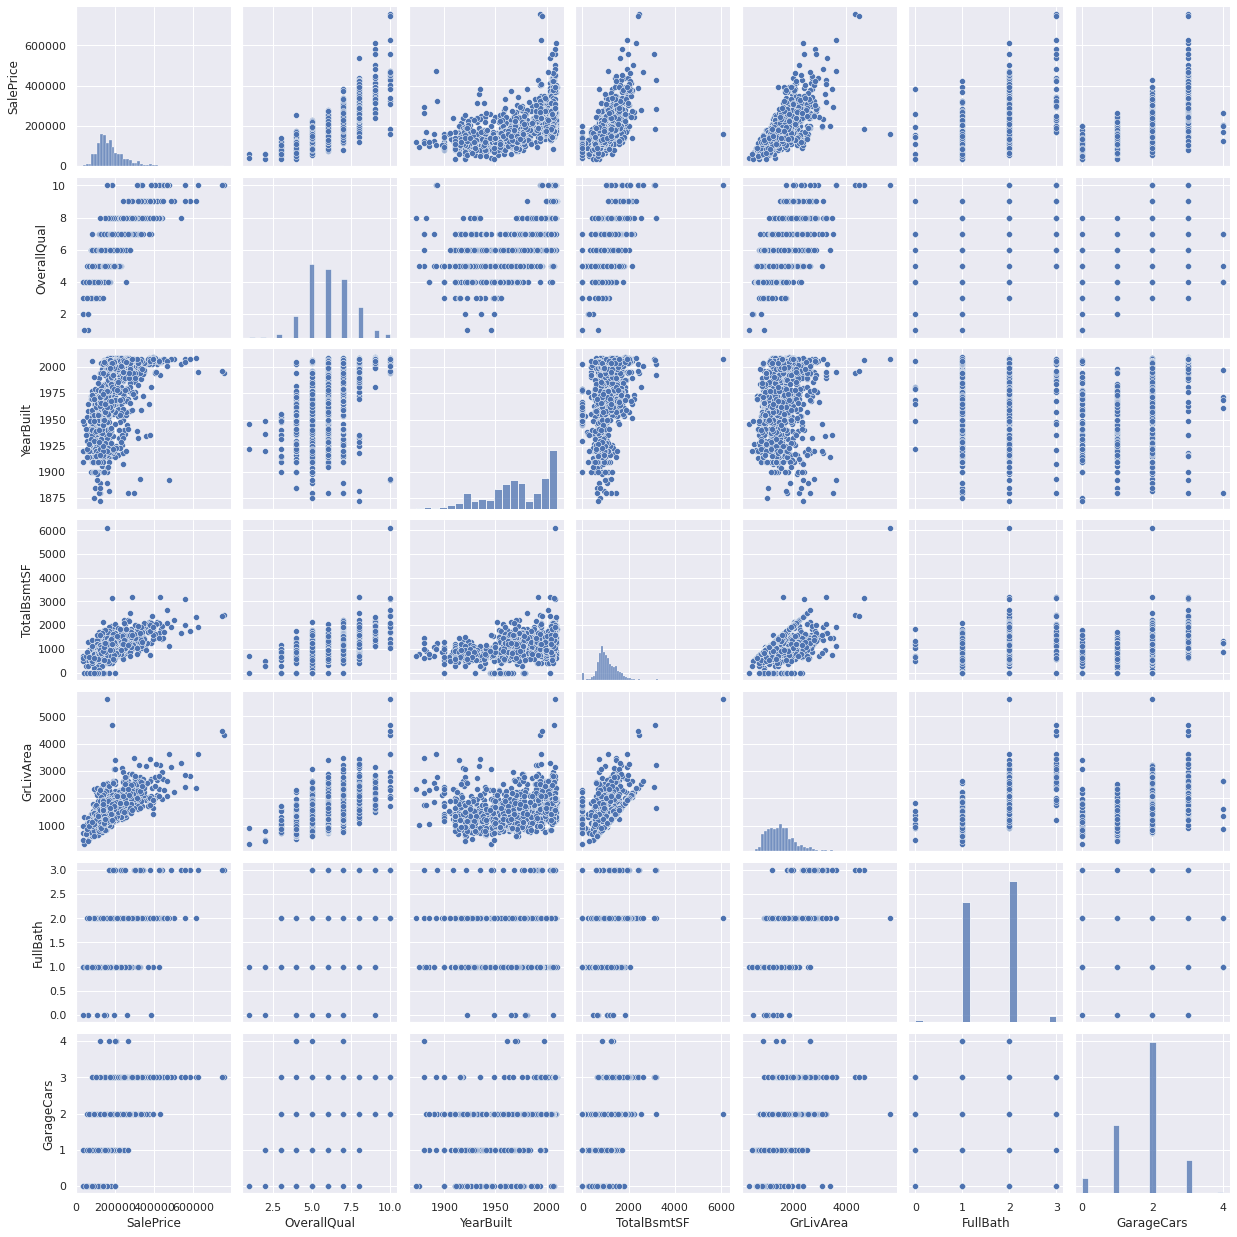

In [20]:
sns.set()
selected_features = ["SalePrice", 'OverallQual', "YearBuilt", "TotalBsmtSF", "GrLivArea", "FullBath", "GarageCars"]
sns.pairplot(df[selected_features], height= 2.5)
plt.show()

From the graph, for example, GrLivArea vs SalePrice graph shows the apperanace of the outliers. Those outliers need to be further detected and remvoed. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


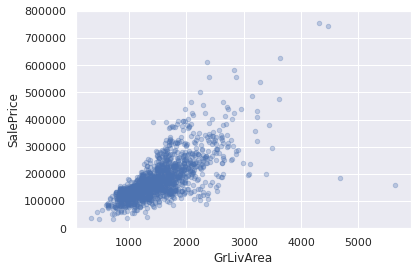

In [21]:
data = pd.concat([df['SalePrice'], df['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', alpha=0.3, ylim=(0,800000));

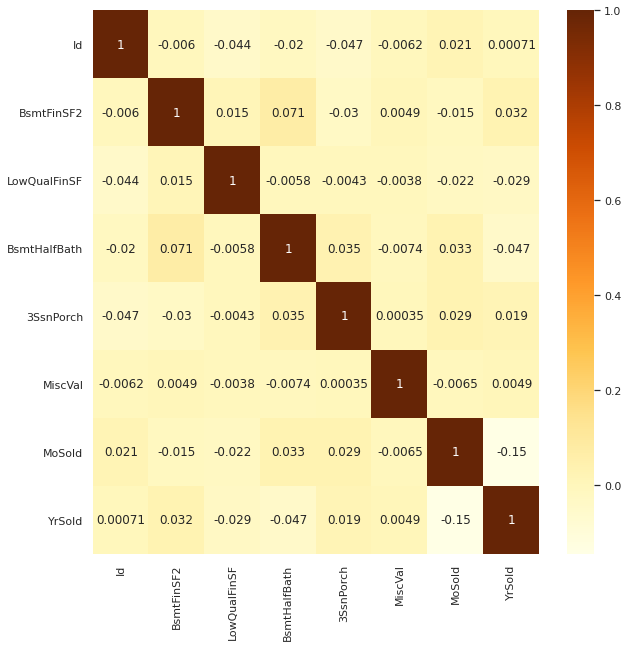

In [22]:
# Least Correlation. Can Set different correlation values 
cormat = df.corr()
least_correlated_features = cormat.index[0.05 > abs(cormat["SalePrice"])]
plt.figure(figsize=(10,10))
graph = sns.heatmap(df[least_correlated_features].corr(), annot=True, cmap="YlOrBr")

Lets now explore the categorical data 

In [23]:
qualitative = [feat for feat in df.columns if df.dtypes[feat] == 'object']
print("Qualitative Variables")
qualitative

Qualitative Variables


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

MSZoning
C (all)     74700
FV         205950
RH         136500
RL         174000
RM         120500
Name: SalePrice, dtype: int64


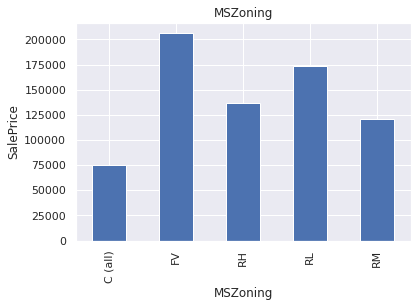

Street
Grvl    114250
Pave    163000
Name: SalePrice, dtype: int64


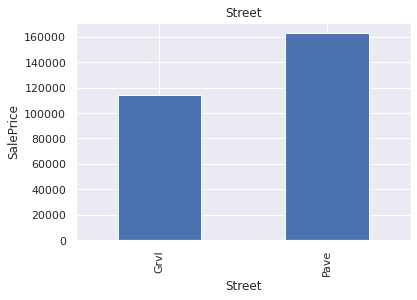

Alley
Grvl    119500
Pave    172500
Name: SalePrice, dtype: int64


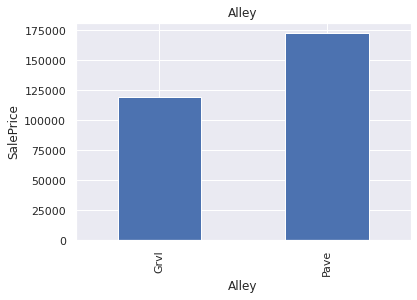

LotShape
IR1    189000
IR2    221000
IR3    203570
Reg    146000
Name: SalePrice, dtype: int64


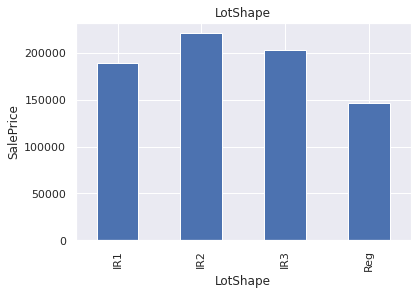

LandContour
Bnk    139400
HLS    222250
Low    190000
Lvl    162900
Name: SalePrice, dtype: int64


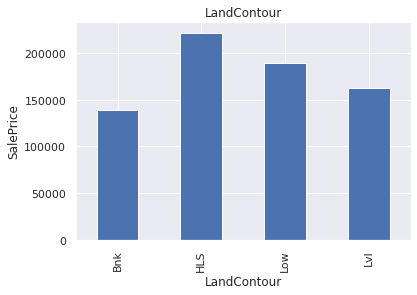

Utilities
AllPub    163000
NoSeWa    137500
Name: SalePrice, dtype: int64


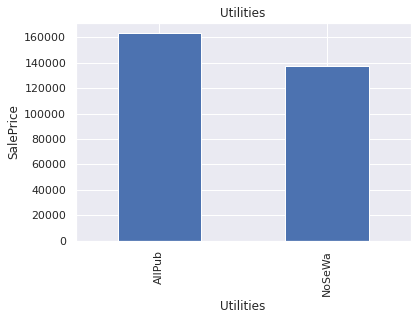

LotConfig
Corner     160000.0
CulDSac    199262.0
FR2        165000.0
FR3        195450.0
Inside     159697.5
Name: SalePrice, dtype: float64


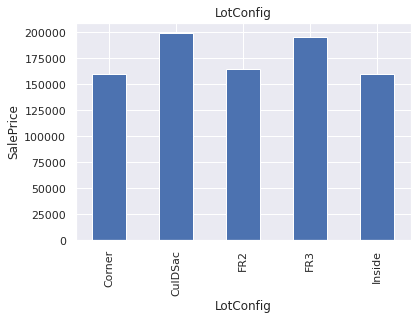

LandSlope
Gtl    161875
Mod    186700
Sev    185000
Name: SalePrice, dtype: int64


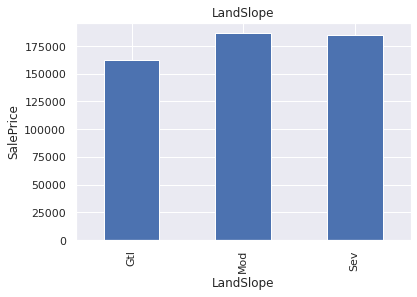

Neighborhood
Blmngtn    191000
Blueste    137500
BrDale     106000
BrkSide    124300
ClearCr    200250
CollgCr    197200
Crawfor    200624
Edwards    121750
Gilbert    181000
IDOTRR     103000
MeadowV     88000
Mitchel    153500
NAmes      140000
NPkVill    146000
NWAmes     182900
NoRidge    301500
NridgHt    315000
OldTown    119000
SWISU      139500
Sawyer     135000
SawyerW    179900
Somerst    225500
StoneBr    278000
Timber     228475
Veenker    218000
Name: SalePrice, dtype: int64


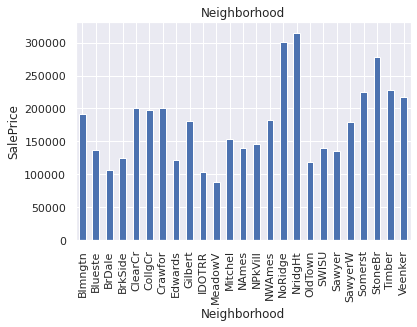

Condition1
Artery    119550
Feedr     140000
Norm      166500
PosA      212500
PosN      200000
RRAe      142500
RRAn      171495
RRNe      190750
RRNn      214000
Name: SalePrice, dtype: int64


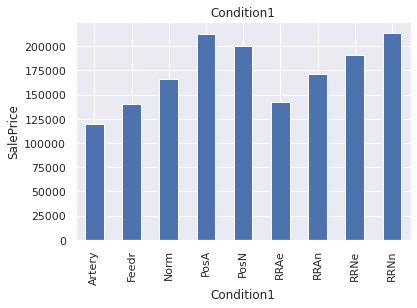

Condition2
Artery    106500
Feedr     127500
Norm      163500
PosA      325000
PosN      284875
RRAe      190000
RRAn      136905
RRNn       96750
Name: SalePrice, dtype: int64


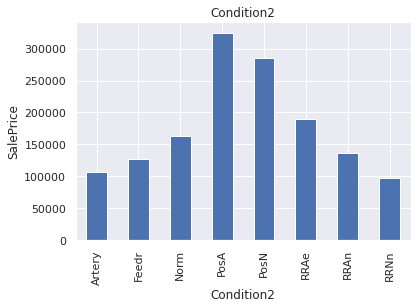

BldgType
1Fam      167900
2fmCon    127500
Duplex    135980
Twnhs     137500
TwnhsE    172200
Name: SalePrice, dtype: int64


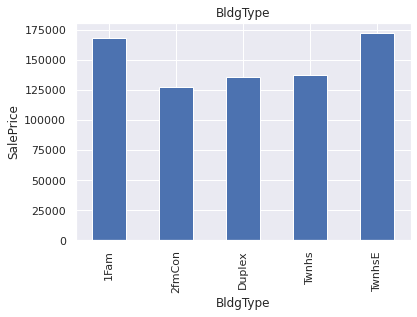

HouseStyle
1.5Fin    132000
1.5Unf    111250
1Story    154750
2.5Fin    194000
2.5Unf    133900
2Story    190000
SFoyer    135960
SLvl      164500
Name: SalePrice, dtype: int64


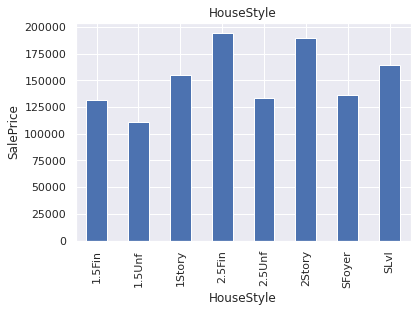

RoofStyle
Flat       185000
Gable      160000
Gambrel    139000
Hip        176500
Mansard    175000
Shed       225000
Name: SalePrice, dtype: int64


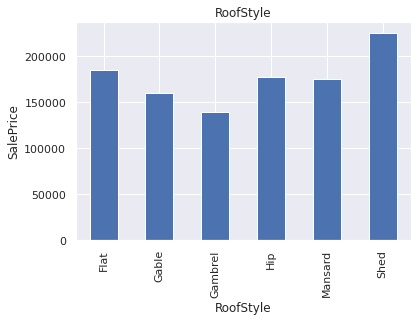

RoofMatl
ClyTile    160000
CompShg    162000
Membran    241500
Metal      180000
Roll       137000
Tar&Grv    167000
WdShake    242000
WdShngl    332500
Name: SalePrice, dtype: int64


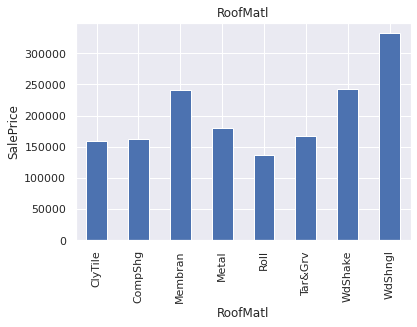

Exterior1st
AsbShng    108000.0
AsphShn    100000.0
BrkComm     71000.0
BrkFace    165750.0
CBlock     105000.0
CemntBd    236500.0
HdBoard    149900.0
ImStucc    262000.0
MetalSd    139000.0
Plywood    167450.0
Stone      258500.0
Stucco     144000.0
VinylSd    200000.0
Wd Sdng    138943.5
WdShing    128700.0
Name: SalePrice, dtype: float64


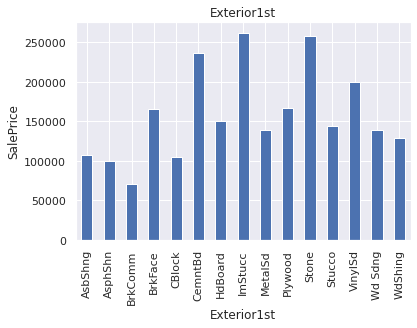

Exterior2nd
AsbShng    111000.0
AsphShn    139000.0
Brk Cmn    147000.0
BrkFace    160000.0
CBlock     105000.0
CmentBd    238750.0
HdBoard    155000.0
ImStucc    187600.0
MetalSd    138750.0
Other      319000.0
Plywood    160750.0
Stone      177000.0
Stucco     142000.0
VinylSd    200070.5
Wd Sdng    138000.0
Wd Shng    138225.0
Name: SalePrice, dtype: float64


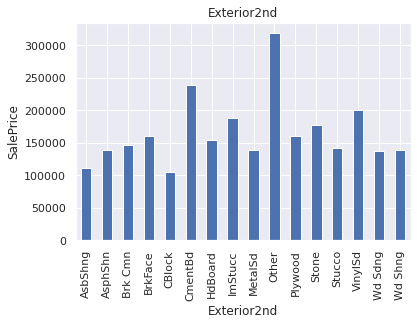

MasVnrType
BrkCmn     139000
BrkFace    181000
None       143000
Stone      246839
Name: SalePrice, dtype: int64


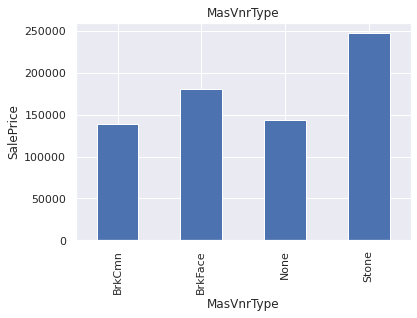

ExterQual
Ex    364606.5
Fa     82250.0
Gd    220000.0
TA    139450.0
Name: SalePrice, dtype: float64


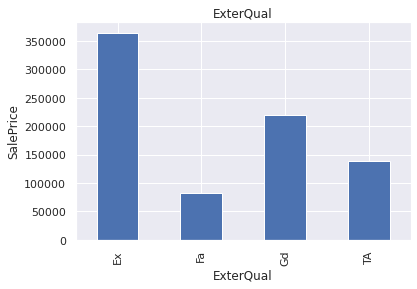

ExterCond
Ex    161000
Fa     95750
Gd    151250
Po     76500
TA    167370
Name: SalePrice, dtype: int64


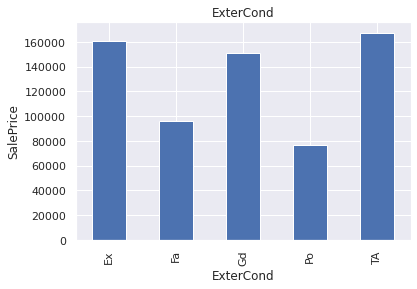

Foundation
BrkTil    125250
CBlock    141500
PConc     205000
Slab      104150
Stone     126500
Wood      164000
Name: SalePrice, dtype: int64


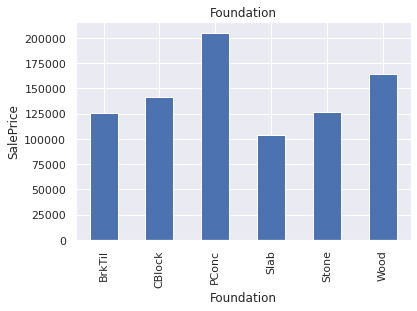

BsmtQual
Ex    318000
Fa    112000
Gd    192070
TA    135500
Name: SalePrice, dtype: int64


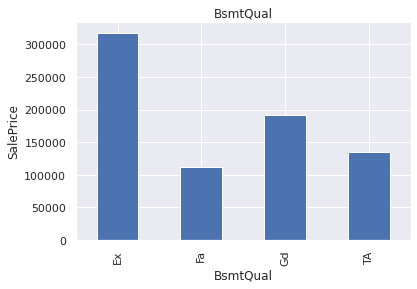

BsmtCond
Fa    118500
Gd    193879
Po     64000
TA    165000
Name: SalePrice, dtype: int64


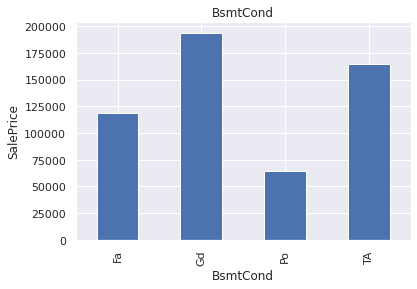

BsmtExposure
Av    185850
Gd    226975
Mn    182450
No    154000
Name: SalePrice, dtype: int64


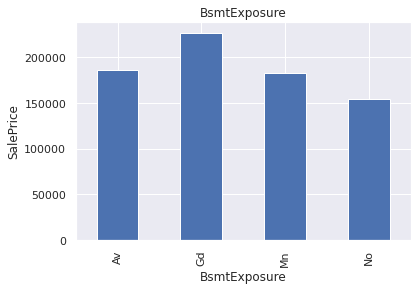

BsmtFinType1
ALQ    149250
BLQ    139100
GLQ    213750
LwQ    139000
Rec    142000
Unf    161750
Name: SalePrice, dtype: int64


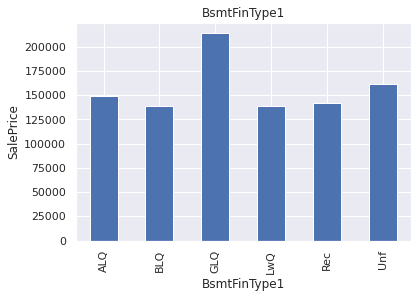

BsmtFinType2
ALQ    174900
BLQ    143000
GLQ    203125
LwQ    154000
Rec    148750
Unf    167000
Name: SalePrice, dtype: int64


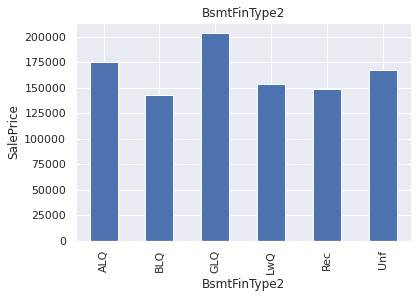

Heating
Floor     72500
GasA     164500
GasW     134950
Grav      79000
OthW     125750
Wall      91450
Name: SalePrice, dtype: int64


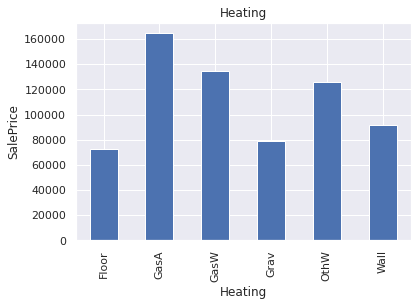

HeatingQC
Ex    194700
Fa    123500
Gd    152000
Po     87000
TA    135000
Name: SalePrice, dtype: int64


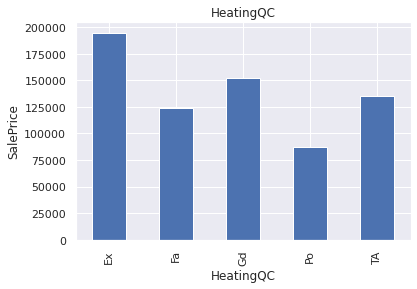

CentralAir
N     98000
Y    168000
Name: SalePrice, dtype: int64


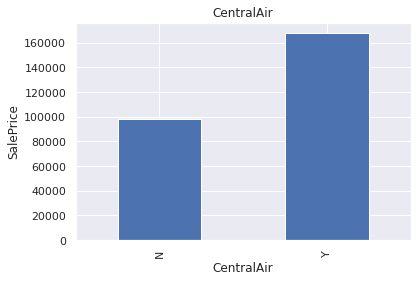

Electrical
FuseA    121250
FuseF    115000
FuseP     82000
Mix       67000
SBrkr    170000
Name: SalePrice, dtype: int64


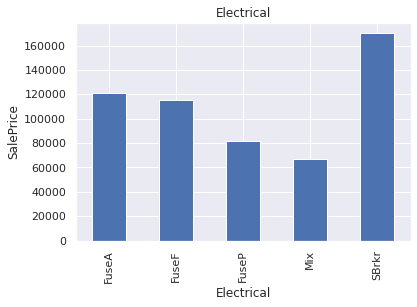

KitchenQual
Ex    316750
Fa    115000
Gd    201400
TA    137000
Name: SalePrice, dtype: int64


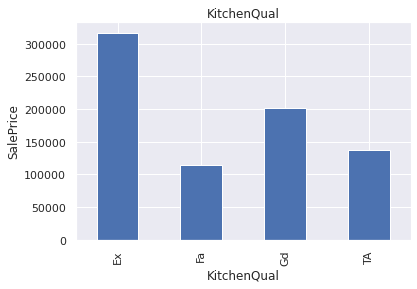

Functional
Maj1    140750
Maj2     85000
Min1    139000
Min2    140000
Mod     137900
Sev     129000
Typ     165500
Name: SalePrice, dtype: int64


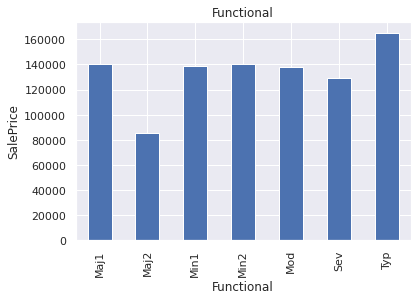

FireplaceQu
Ex    314250
Fa    158000
Gd    206950
Po    131500
TA    187500
Name: SalePrice, dtype: int64


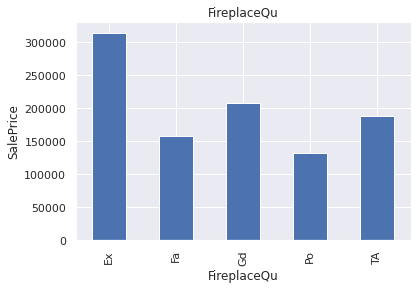

GarageType
2Types     159000
Attchd     185000
Basment    148000
BuiltIn    227500
CarPort    108000
Detchd     129500
Name: SalePrice, dtype: int64


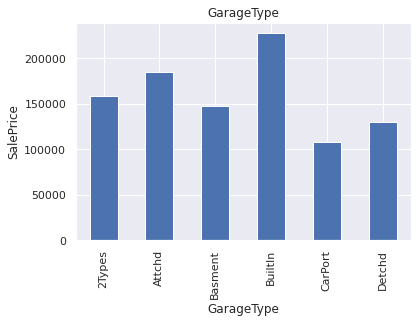

GarageFinish
Fin    215000
RFn    190000
Unf    135000
Name: SalePrice, dtype: int64


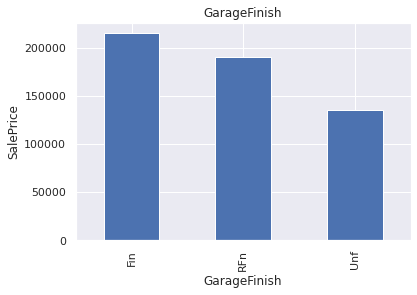

GarageQual
Ex    127500
Fa    115000
Gd    209115
Po     96500
TA    170000
Name: SalePrice, dtype: int64


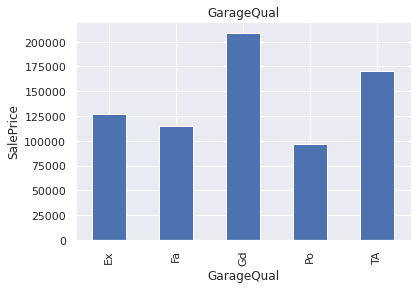

GarageCond
Ex    124000
Fa    114504
Gd    148000
Po    108000
TA    170000
Name: SalePrice, dtype: int64


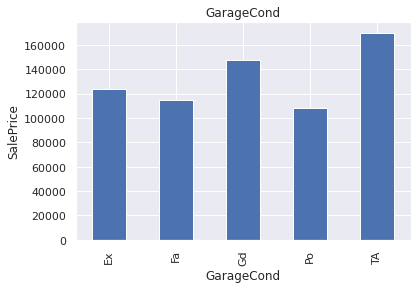

PavedDrive
N    111000
P    132250
Y    168500
Name: SalePrice, dtype: int64


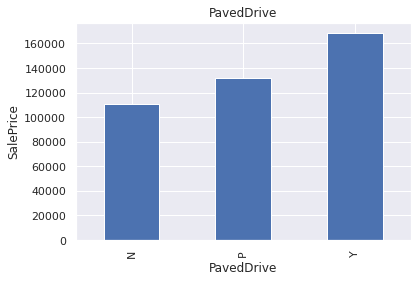

PoolQC
Ex    490000
Fa    215500
Gd    171000
Name: SalePrice, dtype: int64


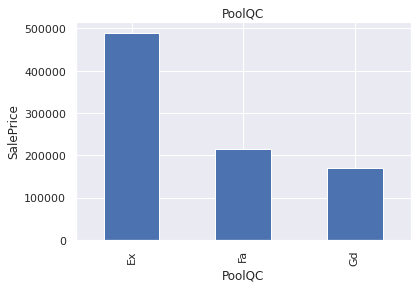

Fence
GdPrv    167500
GdWo     138750
MnPrv    137450
MnWw     130000
Name: SalePrice, dtype: int64


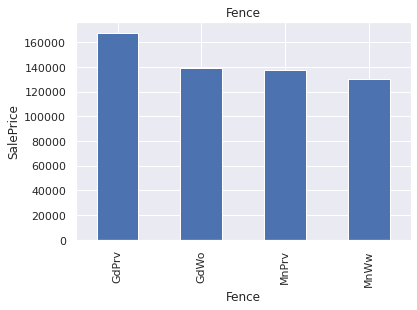

MiscFeature
Gar2    170750
Othr     94000
Shed    144000
TenC    250000
Name: SalePrice, dtype: int64


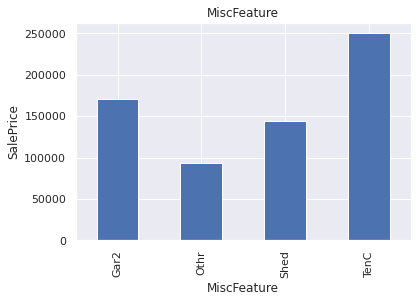

SaleType
COD      139000
CWD      188750
Con      269600
ConLD    140000
ConLI    125000
ConLw    144000
New      247453
Oth      116050
WD       158000
Name: SalePrice, dtype: int64


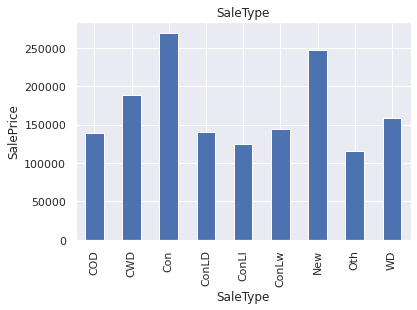

SaleCondition
Abnorml    130000
AdjLand    104000
Alloca     148145
Family     140500
Normal     160000
Partial    244600
Name: SalePrice, dtype: int64


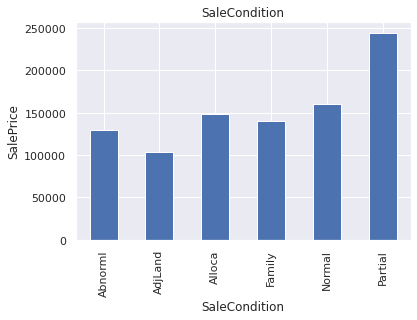

In [24]:
qualitative = [feat for feat in df.columns if df.dtypes[feat] == 'object']
for feat in qualitative:
    data=df.copy()
    dat = data.groupby(feat)['SalePrice'].median()
    print(dat)
    data.groupby(feat)['SalePrice'].median().plot.bar()
    plt.xlabel(feat)
    plt.ylabel('SalePrice')
    plt.title(feat)
    plt.show()

Categorical variables are broken into two main types: Nominal and Ordinal. Nominal categorical variables have no hierarchy to their numbering scheme as if they represent locations. Ordinal categorical variables have a hierarchy to their numbering scheme like high, medium and low. 

# Data preparation and Feature Engineering

### check list:

1.   ID, SalePrice need to be removed from both train and test data

3.   Features with tremendous amount of missing values should be removed.   (Applied to both training and testing dataset)
4.   Missing values need be filled in. 
5.   Remove the Outliers


1.   Target variable transformation need to be done. 
2.   Fix the skewed numeric features (Gab says we do not need this for test set)
3.   Create some other features (leave it at the end, not a must)
4.   One hot Encoding for categorical features and get dummies(?)
5.   Feature scaling


###Remove ID 

In [25]:
#Remove the Ids from train and test
df.drop(['Id'], axis=1, inplace=True)
df_test.drop(['Id'], axis=1, inplace=True)
df.shape, df_test.shape

((1460, 80), (1459, 79))

###Transformation of Target Variable: SalePrice

In [26]:
#log transformation 
df['SalePrice'] = np.log1p(df['SalePrice'])

Now, plot the graph and see if the SalePrice get a normal distribution


 mu = 12.02 and sigma = 0.40



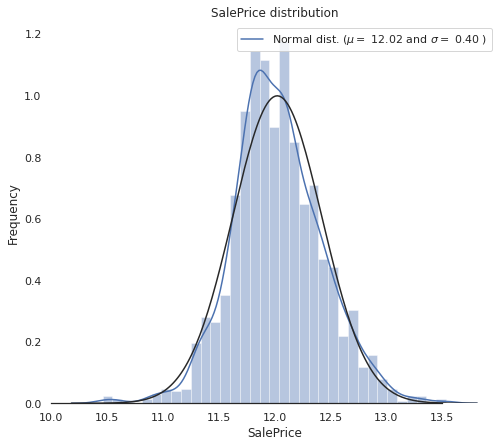

In [27]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))

#Check the new distribution 
sns.distplot(df['SalePrice'] , fit=norm, color="b");

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)

plt.show()

###Remove Outliers

In [28]:
#Remove outliers 
df.drop(df[(df['OverallQual']<5) & (df['SalePrice']>200000)].index, inplace=True)
df.drop(df[(df['GrLivArea']>4500) & (df['SalePrice']<300000)].index, inplace=True)
df.reset_index(drop=True, inplace=True)

df.shape, df_test.shape

((1458, 80), (1459, 79))

In [29]:
#combine the datasets to get implementation easier later

  #separate target variable from dataset 
train_labels = df['SalePrice'].reset_index(drop=True)
train_features = df.drop(['SalePrice'], axis=1)
test_features = df_test

combined_data = pd.concat([train_features, test_features]).reset_index(drop=True)
combined_data.shape

(2917, 79)

###Fill the missing Values

In [30]:
#It is being noticed that some features having tremendous missing values. 
#For example: LotFrontage, Alley, FireplaceQu, PoolQC, Fence, MiscFeature. 
#Those values has to be removed
combined_data.drop(['LotFrontage','Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
combined_data.isnull().sum()


MSSubClass         0
MSZoning           4
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath     

In [31]:
combined_data.head(20)

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0           60       RL     8450   Pave      Reg         Lvl    AllPub   
1           20       RL     9600   Pave      Reg         Lvl    AllPub   
2           60       RL    11250   Pave      IR1         Lvl    AllPub   
3           70       RL     9550   Pave      IR1         Lvl    AllPub   
4           60       RL    14260   Pave      IR1         Lvl    AllPub   
5           50       RL    14115   Pave      IR1         Lvl    AllPub   
6           20       RL    10084   Pave      Reg         Lvl    AllPub   
7           60       RL    10382   Pave      IR1         Lvl    AllPub   
8           50       RM     6120   Pave      Reg         Lvl    AllPub   
9          190       RL     7420   Pave      Reg         Lvl    AllPub   
10          20       RL    11200   Pave      Reg         Lvl    AllPub   
11          60       RL    11924   Pave      IR1         Lvl    AllPub   
12          20       RL    12968   Pave      IR2         Lvl    AllPub   
13          20       RL    10652   Pave      IR1         Lvl    AllPub   
14          20       RL    10920   Pave      IR1         Lvl    AllPub   
15          45       RM     6120   Pave      Reg         Lvl    AllPub   
16          20       RL    11241   Pave      IR1         Lvl    AllPub   
17          90       RL    10791   Pave      Reg         Lvl    AllPub   
18          20       RL    13695   Pave      Reg         Lvl    AllPub   
19          20       RL     7560   Pave      Reg         Lvl    AllPub   

   LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0     Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1        FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2     Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3     Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4        FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   
5     Inside       Gtl      Mitchel       Norm       Norm     1Fam     1.5Fin   
6     Inside       Gtl      Somerst       Norm       Norm     1Fam     1Story   
7     Corner       Gtl       NWAmes       PosN       Norm     1Fam     2Story   
8     Inside       Gtl      OldTown     Artery       Norm     1Fam     1.5Fin   
9     Corner       Gtl      BrkSide     Artery     Artery   2fmCon     1.5Unf   
10    Inside       Gtl       Sawyer       Norm       Norm     1Fam     1Story   
11    Inside       Gtl      NridgHt       Norm       Norm     1Fam     2Story   
12    Inside       Gtl       Sawyer       Norm       Norm     1Fam     1Story   
13    Inside       Gtl      CollgCr       Norm       Norm     1Fam     1Story   
14    Corner       Gtl        NAmes       Norm       Norm     1Fam     1Story   
15    Corner       Gtl      BrkSide       Norm       Norm     1Fam     1.5Unf   
16   CulDSac       Gtl        NAmes       Norm       Norm     1Fam     1Story   
17    Inside       Gtl       Sawyer       Norm       Norm   Duplex     1Story   
18    Inside       Gtl      SawyerW       RRAe       Norm     1Fam     1Story   
19    Inside       Gtl        NAmes       Norm       Norm     1Fam     1Story   

    OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0             7            5       2003          2003     Gable  CompShg   
1             6            8       1976          1976     Gable  CompShg   
2             7            5       2001          2002     Gable  CompShg   
3             7            5       1915          1970     Gable  CompShg   
4             8            5       2000          2000     Gable  CompShg   
5             5            5       1993          1995     Gable  CompShg   
6             8            5       2004          2005     Gable  CompShg   
7             7            6       1973          1973     Gable  CompShg   
8             7            5       1931          1950     Gable

In [32]:
#some catergorical features are stored in numbers, For exmpale MSSubClass, convert them into strings

##This does not make sense. Because YrSold and MoSold are numeric variables. 
combined_data['MSSubClass'] = combined_data['MSSubClass'].apply(str)
combined_data['YrSold'] = combined_data['YrSold'].astype(str)
combined_data['MoSold'] = combined_data['MoSold'].astype(str)

In [33]:
combined_data.head(10)

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0         60       RL     8450   Pave      Reg         Lvl    AllPub   
1         20       RL     9600   Pave      Reg         Lvl    AllPub   
2         60       RL    11250   Pave      IR1         Lvl    AllPub   
3         70       RL     9550   Pave      IR1         Lvl    AllPub   
4         60       RL    14260   Pave      IR1         Lvl    AllPub   
5         50       RL    14115   Pave      IR1         Lvl    AllPub   
6         20       RL    10084   Pave      Reg         Lvl    AllPub   
7         60       RL    10382   Pave      IR1         Lvl    AllPub   
8         50       RM     6120   Pave      Reg         Lvl    AllPub   
9        190       RL     7420   Pave      Reg         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   
5    Inside       Gtl      Mitchel       Norm       Norm     1Fam     1.5Fin   
6    Inside       Gtl      Somerst       Norm       Norm     1Fam     1Story   
7    Corner       Gtl       NWAmes       PosN       Norm     1Fam     2Story   
8    Inside       Gtl      OldTown     Artery       Norm     1Fam     1.5Fin   
9    Corner       Gtl      BrkSide     Artery     Artery   2fmCon     1.5Unf   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            7            5       2003          2003     Gable  CompShg   
1            6            8       1976          1976     Gable  CompShg   
2            7            5       2001          2002     Gable  CompShg   
3            7            5       1915          1970     Gable  CompShg   
4            8            5       2000          2000     Gable  CompShg   
5            5            5       1993          1995     Gable  CompShg   
6            8            5       2004          2005     Gable  CompShg   
7            7            6       1973          1973     Gable  CompShg   
8            7            5       1931          1950     Gable  CompShg   
9            5            6       1939          1950     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   
5     VinylSd     VinylSd       None         0.0        TA        TA   
6     VinylSd     VinylSd      Stone       186.0        Gd        TA   
7     HdBoard     HdBoard      Stone       240.0        TA        TA   
8     BrkFace     Wd Shng       None         0.0        TA        TA   
9     MetalSd     MetalSd       None         0.0        TA        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ       706.0   
1     CBlock       Gd       TA           Gd          ALQ       978.0   
2      PConc       Gd       TA           Mn          GLQ       486.0   
3     BrkTil       TA       Gd           No          ALQ       216.0   
4      PConc       Gd       TA           Av          GLQ       655.0   
5       Wood       Gd       TA           No          GLQ       732.0   
6      PConc       Ex       TA           Av          GLQ      1369.0   
7     CBlock       Gd       TA           Mn          ALQ       859.0   
8     BrkTil       TA       TA           No          Unf     

In [34]:
def fill_missing(features):

    #Those features have been removed. 'LotFrontage','Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'

    features['Functional'] = features['Functional'].fillna('Typ')

    #fill those 2 features with the standard value 
    features['Electrical'] = features['Electrical'].fillna("SBrkr")
    features['KitchenQual'] = features['KitchenQual'].fillna("TA")

    # Replace the missing values below with their mode
    features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode()[0])
    features['Exterior2nd'] = features['Exterior2nd'].fillna(features['Exterior2nd'].mode()[0])
    features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])
    features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
    
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        features[col] = features[col].fillna(0)

    # No garage
    for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
        features[col] = features[col].fillna('None')

    # No basement
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        features[col] = features[col].fillna('None')

    objects = []
    for i in features.columns:
        if features[i].dtype == object:
            objects.append(i)
    features.update(features[objects].fillna('None'))
        
    # And we do the same thing for numerical features, but this time with 0s
    numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numeric = []
    for i in features.columns:
        if features[i].dtype in numeric_dtypes:
            numeric.append(i)
    features.update(features[numeric].fillna(0))    
    return features

combined_data = fill_missing(combined_data)


Confirm that all the missing values got filled up. 0 means null values are all filled. 

In [35]:
combined_data.isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

###Fix Skewed numeric features/variables


find all the numeric features 


In [36]:
#make a list for all the possbile data types
numeric_datatypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_list = []

#select all numeric features from combined training and test dataset by datatype selection
for i in combined_data.columns:
  if combined_data[i].dtype in numeric_datatypes:
    numeric_list.append(i)


Now find those skewed numerical features and transform them into normalized form.

In [37]:
# Find skewed numerical features
skewed_features = combined_data[numeric_list].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skewness = skewed_features[skewed_features > 0.5]
skewness_index = high_skewness.index

print("There are {} numerical features with Skewness > 0.5 :".format(high_skewness.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skewness})
skewed_features.head(10)

There are 24 numerical features with Skewness > 0.5 :


MiscVal          21.939672
PoolArea         17.688664
LotArea          13.109495
LowQualFinSF     12.084539
3SsnPorch        11.372080
KitchenAbvGr      4.300550
BsmtFinSF2        4.144503
EnclosedPorch     4.002344
ScreenPorch       3.945101
BsmtHalfBath      3.929996
dtype: float64

Using scipy function boxcox1p that helps us computes the Box-Cox transformation. It can find a simple transformation to normalize data.

In [38]:
for i in skewness_index:
    combined_data[i] = boxcox1p(combined_data[i], boxcox_normmax(combined_data[i] + 1))

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3538: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


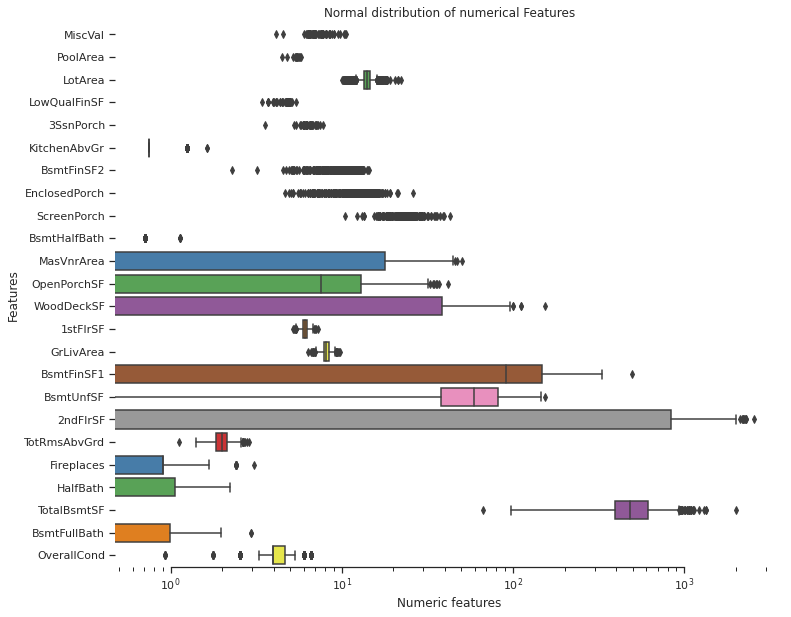

In [39]:
# Let's make sure we handled all the skewed values
sns.set_style("ticks")
f, ax = plt.subplots(figsize=(12, 10))
ax.set_xscale("log")
ax = sns.boxplot(data=combined_data[skewness_index] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Features")
ax.set(xlabel="Numeric features")
ax.set(title="Normal distribution of numerical Features")
sns.despine(trim=True, left=True)

###Creating some additional features

In [40]:
#create a new feature called Total_Bathroom: total count of bathroom including basement 
combined_data['Total_Bathroom'] = (combined_data['FullBath'] + (combined_data['HalfBath'] * 0.5) + combined_data['BsmtFullBath'] + (combined_data['BsmtHalfBath'] * 0.5))

#creat a new feature called Total_square_footage: combine all the indoor areas
combined_data['Total_square_footage'] = (combined_data['TotalBsmtSF'] + combined_data['1stFlrSF'] + combined_data['2ndFlrSF'])

###Encoding Categorical features

In [41]:
combined_data.shape

(2917, 75)

In [42]:
combined_data.head()


MSSubClass MSZoning    LotArea Street LotShape LandContour Utilities  \
0         60       RL  13.833054   Pave      Reg         Lvl    AllPub   
1         20       RL  14.117918   Pave      Reg         Lvl    AllPub   
2         60       RL  14.476512   Pave      IR1         Lvl    AllPub   
3         70       RL  14.106196   Pave      IR1         Lvl    AllPub   
4         60       RL  15.022008   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            7     3.991517       2003          2003     Gable  CompShg   
1            6     6.000033       1976          1976     Gable  CompShg   
2            7     3.991517       2001          2002     Gable  CompShg   
3            7     3.991517       1915          1970     Gable  CompShg   
4            8     3.991517       2000          2000     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace   19.433175        Gd        TA   
1     MetalSd     MetalSd       None    0.000000        TA        TA   
2     VinylSd     VinylSd    BrkFace   17.768840        Gd        TA   
3     Wd Sdng     Wd Shng       None    0.000000        TA        TA   
4     VinylSd     VinylSd    BrkFace   25.404164        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ  144.117862   
1     CBlock       Gd       TA           Gd          ALQ  181.719186   
2      PConc       Gd       TA           Mn          GLQ  110.441033   
3     BrkTil       TA       Gd           No          ALQ   61.795315   
4      PConc       Gd       TA           Av          GLQ  136.624601   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0  29.991055   422.488510    GasA        Ex   
1          Unf         0.0  44.135415   593.888179    GasA        Ex   
2          Unf         0.0  56.896536   450.079716    GasA        Ex   
3          Unf         0.0  64.808858   378.854568    GasA        Gd   
4          Unf         0.0  61.166379   545.309927    GasA        Ex   

  CentralAir Electrical  1stFlrSF     2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr  5.939034  1025.651979           0.0   8.353543   
1          Y      SBrkr  6.234991     0.000000           0.0   7.974693   
2          Y      SBrkr  5.994336  1040.521060           0.0   8.408064   
3          Y      SBrkr  6.027705   904.477422           0.0   8.358662   
4          Y      SBrkr  6.161222  1273.024863           0.0   8.669321   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0       0.99344      0.000000         2  1.068837             3      0.750957   
1       0.00000      0.710895         2  0.000000             3      0.750957   
2       0.99344      0.000000         2  1.068837             3      0.750957   
3       0.99344      0.000000         1  0.000000             3      0.750957   
4       0.99344      0.000000         2  1.068837             4      0.750957   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd      2.261968        Typ    0.000000     Attchd       2003.0   
1          TA      1.996577        Typ    0.903334     Attchd       1976.0   
2          Gd      1.996577        Typ    0.903334     Attchd       2001.0   
3          Gd      2.137369        Typ    0.903334     Detchd       1998.0  

In [43]:
#converting those categorical features into numeric

combined_data = pd.get_dummies(combined_data).reset_index(drop=True)

In [44]:
combined_data.shape

(2917, 310)

In [45]:
combined_data.head()

LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  \
0  13.833054            7     3.991517       2003          2003   19.433175   
1  14.117918            6     6.000033       1976          1976    0.000000   
2  14.476512            7     3.991517       2001          2002   17.768840   
3  14.106196            7     3.991517       1915          1970    0.000000   
4  15.022008            8     3.991517       2000          2000   25.404164   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF     2ndFlrSF  \
0  144.117862         0.0  29.991055   422.488510  5.939034  1025.651979   
1  181.719186         0.0  44.135415   593.888179  6.234991     0.000000   
2  110.441033         0.0  56.896536   450.079716  5.994336  1040.521060   
3   61.795315         0.0  64.808858   378.854568  6.027705   904.477422   
4  136.624601         0.0  61.166379   545.309927  6.161222  1273.024863   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0           0.0   8.353543       0.99344      0.000000         2  1.068837   
1           0.0   7.974693       0.00000      0.710895         2  0.000000   
2           0.0   8.408064       0.99344      0.000000         2  1.068837   
3           0.0   8.358662       0.99344      0.000000         1  0.000000   
4           0.0   8.669321       0.99344      0.000000         2  1.068837   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
0             3      0.750957      2.261968    0.000000       2003.0   
1             3      0.750957      1.996577    0.903334       1976.0   
2             3      0.750957      1.996577    0.903334       2001.0   
3             3      0.750957      2.137369    0.903334       1998.0   
4             4      0.750957      2.373753    0.903334       2000.0   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         2.0       548.0    0.000000    12.080309       0.000000        0.0   
1         2.0       460.0   56.184223     0.000000       0.000000        0.0   
2         2.0       608.0    0.000000     9.901081       0.000000        0.0   
3         3.0       642.0    0.000000     8.966115      16.020711        0.0   
4         3.0       836.0   42.245702    14.271568       0.000000        0.0   

   ScreenPorch  PoolArea  MiscVal  Total_Bathroom  Total_square_footage  \
0          0.0       0.0      0.0        3.527858           1454.079523   
1          0.0       0.0      0.0        2.355448            600.123170   
2          0.0       0.0      0.0        3.527858           1496.595112   
3          0.0       0.0      0.0        1.993440           1289.359694   
4          0.0       0.0      0.0        3.527858           1824.496012   

   MSSubClass_120  MSSubClass_150  MSSubClass_160  MSSubClass_180  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSSubClass_190  MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
0               0              0              0              0              0   
1               0              1              0              0              0   
2               0              0              0              0              0   
3               0              0              0              0              0   
4               0              0              0              0              0   

   MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
0              0              1              0              0              0   
1              0              0              0              0              0   
2              0              1              0              0              0   
3              0 

In [46]:
#remove any duplicated coloumn names if exist
combined_data = combined_data.loc[:,~combined_data.columns.duplicated()]

In [47]:
combined_data.shape

(2917, 310)

###Create Training and test datasets from combined_data

This Kaggle competition has no target variable provided for testset. Once finish constructing the model using training set and tune for the best result, all we need to do is feed in the test datset and submit the result for ranking at Kaggle. Below is the original test dataset without any modification.

In [48]:
originaltest_df.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   
5  1466          60       RL         75.0    10000   Pave   NaN      IR1   
6  1467          20       RL          NaN     7980   Pave   NaN      IR1   
7  1468          60       RL         63.0     8402   Pave   NaN      IR1   
8  1469          20       RL         85.0    10176   Pave   NaN      Reg   
9  1470          20       RL         70.0     8400   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   
5         Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
6         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
7         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
8         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
9         Lvl    AllPub    Corner       Gtl        NAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   
5       Norm     1Fam     2Story            6            5       1993   
6       Norm     1Fam     1Story            6            7       1992   
7       Norm     1Fam     2Story            6            5       1998   
8       Norm     1Fam     1Story            7            5       1990   
9       Norm     1Fam     1Story            4            5       1970   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   
5          1994     Gable  CompShg     HdBoard     HdBoard       None   
6          2007     Gable  CompShg     HdBoard     HdBoard       None   
7          1998     Gable  CompShg     VinylSd     VinylSd       None   
8          1990     Gable  CompShg     HdBoard     HdBoard       None   
9          1970     Gable  CompShg     Plywood     Plywood       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   
5         0.0        TA        TA      PConc       Gd       TA           No   
6         0.0        TA        Gd      PConc       Gd       TA           No   
7         0.0        TA        TA      PConc       Gd       TA           No   
8         0.0        TA        TA      PConc       Gd       TA     

In [49]:

#before feature scaling, split and create train, test datasets to prevent the info leakage
X_train = combined_data.iloc[:len(train_labels), :]
X_test = combined_data.iloc[len(train_labels):, :]
y_train = train_labels


In [50]:
X_train.shape, X_test.shape

((1458, 310), (1459, 310))

###Feature Scaling

Especially with gradient descent-based algorithms,Feature scaling can speed up gradient descent. theta will descend quickly on small ranges and slowly on large ranges, and it will oscillate inefficiently down to the optimum when the variables are very uneven. 

In [51]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Modeling

## Preparation

### Preparing X & y

In [52]:
X = pd.DataFrame(X_train_scaled) #train_features
#X.drop(['Id','SalePrice'], axis = 1, inplace = True)
#y = df_encoded['SalePrice']
y = pd.DataFrame(y_train) #train_labels
print(X.shape)
print(y.shape)
print(X.columns)
print(X.describe())
print(y.describe())

(1458, 310)
(1458, 1)
RangeIndex(start=0, stop=310, step=1)
               0            1            2            3            4    \
count  1458.000000  1458.000000  1458.000000  1458.000000  1458.000000   
mean      0.329555     0.565996     0.604316     0.718972     0.580567   
std       0.094471     0.152930     0.132891     0.218795     0.344029   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.294611     0.444444     0.536679     0.594203     0.283333   
50%       0.336246     0.555556     0.536679     0.728261     0.733333   
75%       0.373932     0.666667     0.657139     0.927536     0.900000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               5            6            7            8            9    \
count  1458.000000  1458.000000  1458.000000  1458.000000  1458.000000   
mean      0.163405     0.274240     0.078237     0.393698     0.372935   
std       0.219680     0.238987     0.223050     0.

### Functions & helpers

#### Inverse

In [53]:
def fix_predict(y_pred):
  return np.exp(y_pred)-1

#### Generate predictions

In [54]:
def predict_and_generate_submission(model,name,X_test,org_test_with_index,X,y):
  model.fit(X,y)
  y_pred = model.predict(X_test)
  y_pred_inverse = pd.DataFrame(y_pred).apply(fix_predict)
  prediction_submission = pd.concat([org_test_with_index['Id'],y_pred_inverse],axis=1)
  prediction_submission.columns = ['Id','SalePrice']
  prediction_submission.to_csv(base_dir+'/submissions/'+name+'.csv', index=False)
  return prediction_submission

In [55]:
def predict_and_generate_submission_after_fit(model_after_fit,name,X_test,org_test_with_index):
  y_pred = model_after_fit.predict(X_test)
  y_pred_inverse = pd.DataFrame(y_pred).apply(fix_predict)
  prediction_submission = pd.concat([org_test_with_index['Id'],y_pred_inverse],axis=1)
  prediction_submission.columns = ['Id','SalePrice']
  prediction_submission.to_csv(base_dir+'/submissions/'+name+'.csv', index=False)
  return prediction_submission

## Regression techniques

In [ ]:
# all the metrics provided by sklearn
print(metrics.SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])


### Ridge regression

In [ ]:
#import statistics
alphas = [0.001, 0.01, 0.1, 1, 10]
print('All errors are RMSE')
print('-'*80)
for alpha in alphas:
  clf = Ridge(alpha=alpha)
  # clf.fit(X, y)
  cv_results = cross_validate(clf, X, y, cv=5, scoring='neg_root_mean_squared_error')
  print(str(cv_results['test_score']), statistics.mean(cv_results['test_score']))

All errors are RMSE
--------------------------------------------------------------------------------
[-0.11744199 -0.1251325  -0.14365863 -0.11195227 -0.11786051] -0.12320917918860344
[-0.1169921  -0.12498776 -0.14263425 -0.11173866 -0.11777365] -0.1228252865784927
[-0.11446815 -0.12392535 -0.13797262 -0.11053363 -0.11704303] -0.12078855589395286
[-0.10836904 -0.12094605 -0.13037804 -0.10645863 -0.11393608] -0.11601756868150612
[-0.11142785 -0.1268612  -0.12795107 -0.1105066  -0.11518748] -0.11838684021807405


In [ ]:
pred_sub = predict_and_generate_submission(Ridge(alpha=1.0),'ridge',X_test_scaled,original_df_test,X,y)
print(pred_sub.head())

     Id      SalePrice
0  1461  121601.740556
1  1462  159071.303301
2  1463  186853.015804
3  1464  200887.924777
4  1465  198524.539519


### Lasso Regression

In [59]:
alphas = [0.001, 0.01, 0.1, 1, 10]
print('All errors are RMSE')
print('-'*76)
for alpha in alphas:
  lasso = linear_model.Lasso(alpha=alpha)
  Lasso_results = cross_validate(lasso, X, y, cv=5, scoring='neg_root_mean_squared_error')
  print(str(Lasso_results['test_score']), statistics.mean(Lasso_results['test_score']))

All errors are RMSE
----------------------------------------------------------------------------
[-0.10267341 -0.11649449 -0.12161598 -0.10461369 -0.10940076] -0.11095966629599918
[-0.15738616 -0.18716205 -0.18920653 -0.15628612 -0.16251077] -0.1705103264469294
[-0.36789014 -0.40931266 -0.39156741 -0.36413374 -0.37308378] -0.3811975460642522
[-0.38677801 -0.42529698 -0.4099814  -0.38336724 -0.39191742] -0.3994682097577766
[-0.38677801 -0.42529698 -0.4099814  -0.38336724 -0.39191742] -0.3994682097577766


In [ ]:
pred_sub = predict_and_generate_submission(linear_model.Lasso(0.001),'lasso',X_test_scaled,original_df_test,X,y)
print(pred_sub.head())

     Id      SalePrice
0  1461  117627.508206
1  1462  158918.786920
2  1463  180550.773483
3  1464  197746.514634
4  1465  191633.254664


### Random Forest Regressor

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

[-0.22578439 -0.24022797 -0.23496403 -0.22248756 -0.22986753]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Feature ranking:
1. feature 1 - 0 (0.815628)
2. feature 32 - 1 (0.058519)
3. feature 13 - 2 (0.052806)
4. feature 24 - 3 (0.033028)
5. feature 23 - 4 (0.032560)
6. feature 10 - 5 (0.002672)
7. feature 33 - 6 (0.002419)
8. feature 194 - 7 (0.002367)
9. feature 112 - 8 (0.000000)
10. feature 106 - 9 (0.000000)
11. feature 101 - 10 (0.000000)
12. feature 102 - 11 (0.000000)
13. feature 103 - 12 (0.000000)
14. feature 104 - 13 (0.000000)
15. feature 105 - 14 (0.000000)
16. feature 114 - 15 (0.000000)
17. feature 107 - 16 (0.000000)
18. feature 111 - 17 (0.000000)
19. feature 113 - 18 (0.000000)
20. feature 108 - 19 (0.000000)
21. feature 109 - 20 (0.000000)
22. feature 110 - 21 (0.000000)
23. feature 309 - 22 (0.000000)
24. feature 99 - 23 (0.000000)
25. feature 100 - 24 (0.000000)
26. feature 116 - 25 (0.000000)
27. feature 82 - 26 (0.000000)
28. feature 83 - 27 (0.000000)
29. feature 84 - 28 (0.000000)
30. feature 85 - 29 (0.000000)
31. feature 86 - 30 (0.000000)
32. feature 87 - 31 (0.0

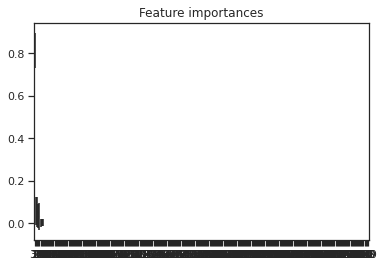

In [ ]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
RFR_results = cross_validate(regr, X, y, cv=5, scoring='neg_root_mean_squared_error')
print(RFR_results['test_score'])
regr.fit(X,y)

importances = regr.feature_importances_
std = np.std([t.feature_importances_ for t in regr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], X.columns[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
depths = [2,3,4,5,10,100]
for d in depths:
  regr = RandomForestRegressor(max_depth=d, random_state=0)
  RFR_results = cross_validate(regr, X, y, cv=5, scoring='neg_root_mean_squared_error')
  print(RFR_results['test_score'],"-", statistics.mean(RFR_results['test_score']))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

[-0.22578439 -0.24022797 -0.23496403 -0.22248756 -0.22986753] - -0.230666296627188


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

[-0.18498982 -0.19894583 -0.2022432  -0.18352623 -0.1952912 ] - -0.19299925687725486


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

[-0.16443233 -0.17387556 -0.17864368 -0.16204065 -0.1739972 ] - -0.1705978855306264


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

[-0.15212411 -0.15946331 -0.16597065 -0.14809353 -0.15987881] - -0.15710608490510372


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

[-0.1355516  -0.14369706 -0.14553035 -0.12994984 -0.14347369] - -0.1396405060583096


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

[-0.13502849 -0.14282839 -0.14549715 -0.12897092 -0.14196664] - -0.1388583194588708


In [ ]:
pred_sub = predict_and_generate_submission(RandomForestRegressor(max_depth=10, random_state=0),'randomforest',X_test_scaled,original_df_test,X,y)
print(pred_sub.head())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


     Id      SalePrice
0  1461  124037.502223
1  1462  156239.996911
2  1463  181658.565816
3  1464  182171.922574
4  1465  195928.647980


### Elastic net

In [ ]:
elastic_net_model = ElasticNet(random_state=0)
elastic_net_result = cross_validate(elastic_net_model, X, y, cv=5, scoring='neg_root_mean_squared_error')
print(elastic_net_result['test_score'])

[-0.38677801 -0.42529698 -0.4099814  -0.38336724 -0.39191742]


### XGBoost

In [ ]:
xg_reg_model = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 0.1, n_estimators = 10)
xg_reg_model_2 = xgb.XGBRegressor(learning_rate = 0.1, alpha = 0.1)
xg_result = cross_validate(xg_reg_model, X, y, cv=5, scoring='neg_root_mean_squared_error')
print(xg_result['test_score'],"->",statistics.mean(xg_result['test_score']))
xg_result_2 = cross_validate(xg_reg_model_2, X, y, cv=5, scoring='neg_root_mean_squared_error')
print(xg_result_2['test_score'],"->",statistics.mean(xg_result_2['test_score']))
LR_all = [0.1, 1, 0.01, 0.001]
alpha_all = [0.1]
depth_all = [3,4,5,7,10]
a = [LR_all, alpha_all, depth_all]
LR_Alpha_depth  = itertools.product(*a)
for lad in LR_Alpha_depth:
  print(lad)
  xg_reg_model_custom = xgb.XGBRegressor(learning_rate=lad[0],alpha=lad[1],max_depth=lad[2],verbosity=0)
  xg_result_custom = cross_validate(xg_reg_model_custom, X, y, cv=5, scoring='neg_root_mean_squared_error')
  print(xg_result_custom['test_score'],"->",statistics.mean(xg_result_custom['test_score']))  

[01:40:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:40:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:40:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:40:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:40:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[-4.04918794 -4.04203654 -4.05078458 -3.99941295 -4.04422668] -> -4.037129740683817
[01:40:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:40:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:40:32] WARNING: /worksp

In [ ]:
xgb_final_model = xgb.XGBRegressor(learning_rate=0.1,alpha=0.1,max_depth=4,verbosity=0)
pred_sub = predict_and_generate_submission(xgb_final_model,'xgboost',pd.DataFrame(X_test_scaled),original_df_test,X,y)
print(pred_sub.head())

     Id      SalePrice
0  1461  119692.984375
1  1462  157283.234375
2  1463  183427.328125
3  1464  185069.187500
4  1465  188924.468750


## Deep learning techniques

### RMSE metrics

In [ ]:
from keras import backend
def mean_squared_error(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)
def rmse(y_true, y_pred):
	return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

In [ ]:
X_np = np.array(X)
y_np = np.array(y)
print(X_np.shape)
print(y_np.shape)

(1458, 310)
(1458, 1)


### First neural network

(1166, 310)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 128)               39808     
_________________________________________________________________
dense_26 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_27 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_28 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 65        
Total params: 56,449
Trainable params: 56,449
Non-trainable params: 0
_________________________________________________________________


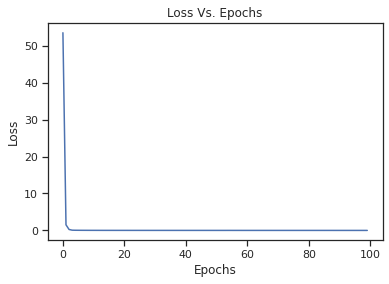

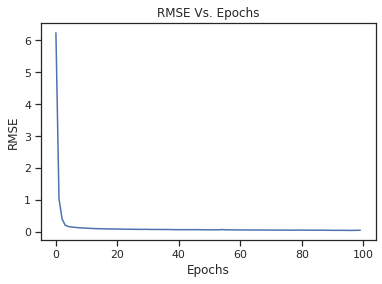

0.13173673624872104
(1166, 310)
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 128)               39808     
_________________________________________________________________
dense_31 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_32 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_33 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 65        
Total params: 56,449
Trainable params: 56,449
Non-trainable params: 0
_________________________________________________________________


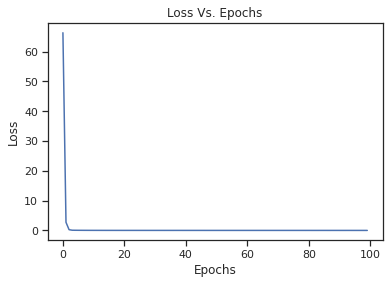

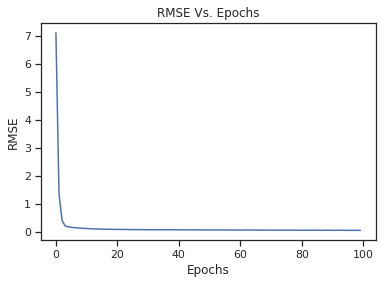

0.15425266329333348
(1166, 310)
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 128)               39808     
_________________________________________________________________
dense_36 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_37 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_38 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 65        
Total params: 56,449
Trainable params: 56,449
Non-trainable params: 0
_________________________________________________________________


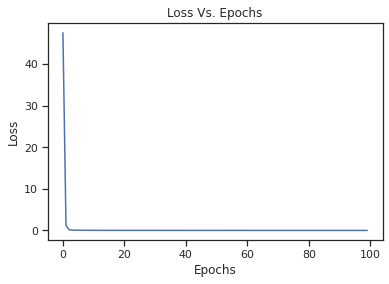

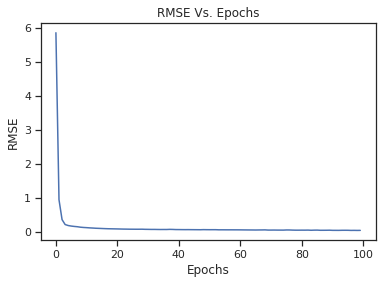

0.170236376709006
(1167, 310)
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 128)               39808     
_________________________________________________________________
dense_41 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_42 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_43 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 65        
Total params: 56,449
Trainable params: 56,449
Non-trainable params: 0
_________________________________________________________________


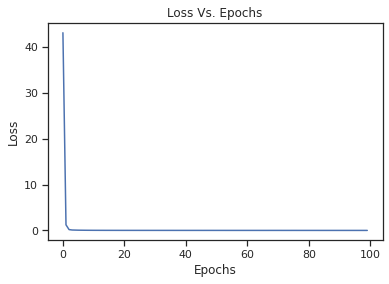

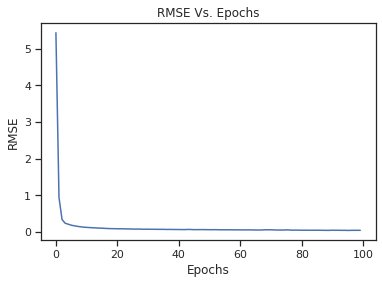

0.13659831710569126
(1167, 310)
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 128)               39808     
_________________________________________________________________
dense_46 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_47 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_48 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 65        
Total params: 56,449
Trainable params: 56,449
Non-trainable params: 0
_________________________________________________________________


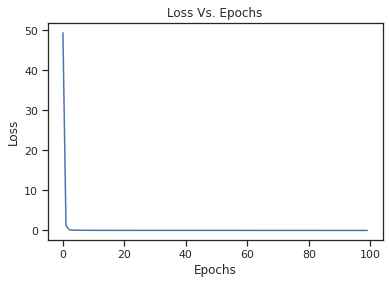

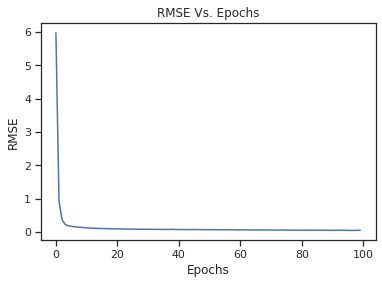

0.1325940213513028


In [ ]:
from keras.optimizers import SGD
kfold = KFold(n_splits=5, shuffle=False)
for train_index, test_index in kfold.split(X_np, y_np):
  NN_model = Sequential() #initialize ANN
  #print(train_index,test_index)
  X_train, X_test = X_np[train_index], X_np[test_index]
  y_train, y_test = y_np[train_index], y_np[test_index]
  print(X_train.shape)
  # The Input Layer :
  NN_model.add(Dense(128,input_shape = (X_train.shape[1],), activation='tanh'))#128

  # The Hidden Layers :
  NN_model.add(Dense(64, activation='relu'))#64
  NN_model.add(Dense(64, activation='relu'))
  NN_model.add(Dense(64, activation='relu'))

  # The Output Layer :
  
  NN_model.add(Dense(1, activation='linear'))
  # Compile the network :
  NN_model.compile(loss='mse', optimizer='adam', metrics=[rmse])
  NN_model.summary()

  history_NN = NN_model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=False)
  plt.plot(history_NN.history['loss'])
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title("Loss Vs. Epochs")
  plt.show()
  plt.plot(history_NN.history['rmse'])
  plt.xlabel('Epochs')
  plt.ylabel('RMSE')
  plt.title("RMSE Vs. Epochs")
  plt.show()
  y_predict = NN_model.predict(X_test)
  print(np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

In [ ]:
NN_model.fit(X_np, y_np, epochs=100, batch_size=50, verbose=False)
pred_sub_NN1 = predict_and_generate_submission_after_fit(NN_model,'NN1',np.array(X_test_scaled),original_df_test)
print(pred_sub_NN1.head())

     Id      SalePrice
0  1461  130137.406250
1  1462  157609.062500
2  1463  186682.109375
3  1464  209604.828125
4  1465  212184.421875


### Hyperparameter tuning with GridSearch

In [ ]:
def create_model(optimizer = 'rmsprop', input_shape = 310):#, hidden_layers = []):
    input_seq = Input(shape=(input_shape,))
    hidden_1 = Dense(128, activation = 'tanh')(input_seq)
    hidden_2 = Dense(64, activation = 'tanh')(hidden_1)
    hidden_3 = Dense(128, activation = 'tanh')(hidden_2)
    output_seq = Dense(1, activation= 'linear')(hidden_3)
    # last_layer = input_seq
    # for nodes in hidden_layers:
    #   new_hidden = Dense(nodes, activation = 'tanh')(last_layer)
    #   last_layer = new_hidden
    # output_seq = Dense(1, activation= 'linear')(last_layer)
    model_class = Model(input_seq,output_seq)
    model_class.compile(optimizer = optimizer, loss='mse', metrics=[rmse])
    #print(model_class.summary())
    return model_class

In [ ]:
optimizers = ['rmsprop', 'SGD','adam']
batches = [50, 5]
epochs=[100, 50]
#hidden_layers = [[50]]#, [29,24,19], [100, 200, 100]]
param_grid = dict(batch_size=batches, optimizer=optimizers, epochs=epochs)
print(param_grid)
hp_model = KerasRegressor(build_fn=create_model, verbose=0)
grid=GridSearchCV(estimator = hp_model, param_grid = param_grid)
grid_result = grid.fit(X_np, y_np)

{'batch_size': [50, 5], 'optimizer': ['rmsprop', 'SGD', 'adam'], 'epochs': [100, 50]}


In [ ]:
print(grid_result.best_score_)
print(grid_result.best_params_)

-0.01951516754925251
{'batch_size': 50, 'epochs': 100, 'optimizer': 'adam'}


In [ ]:
pred_sub_gridNN = predict_and_generate_submission_after_fit(grid,'gridNN',np.array(X_test_scaled),original_df_test)
print(pred_sub_gridNN.head())

     Id      SalePrice
0  1461  133204.734375
1  1462  155468.015625
2  1463  189907.359375
3  1464  198013.656250
4  1465  184185.468750


### GridSearch + different architectures

In [ ]:
# Start with basic one layer
def baseline_model(optimizer,input_shape=310,hidden_activation='relu'):
  input_seq = Input(shape=(input_shape,))
  hidden_1 = Dense(155, activation = hidden_activation)(input_seq)
  output_seq = Dense(1, activation= 'linear')(hidden_1)
  model_class = Model(input_seq,output_seq)
  model_class.compile(optimizer = optimizer, loss='mse', metrics=[rmse])
  return model_class
#Smaller number of neurons 
def compact_model(optimizer,input_shape=310,hidden_activation='relu'):
  input_seq = Input(shape=(input_shape,))
  hidden_1 = Dense(53, activation = hidden_activation)(input_seq)
  output_seq = Dense(1, activation= 'linear')(hidden_1)
  model_class = Model(input_seq,output_seq)
  model_class.compile(optimizer = optimizer, loss='mse', metrics=[rmse])
  return model_class
# big small big neurons   
def autoencoder_model(optimizer,input_shape=310,hidden_activation='relu'):
  input_seq = Input(shape=(input_shape,))
  hidden_1 = Dense(80, activation = hidden_activation)(input_seq)
  hidden_2 = Dense(40, activation = hidden_activation)(hidden_1)
  hidden_3 = Dense(80, activation = hidden_activation)(hidden_2)
  output_seq = Dense(1, activation= 'linear')(hidden_3)
  model_class = Model(input_seq,output_seq)
  model_class.compile(optimizer = optimizer, loss='mse', metrics=[rmse])
  return model_class
# Neurons just keep decreasing 
def decreasing_model(optimizer,input_shape=310,hidden_activation='relu'):
  input_seq = Input(shape=(input_shape,))
  hidden_1 = Dense(155, activation = hidden_activation)(input_seq)
  hidden_2 = Dense(78, activation = hidden_activation)(hidden_1)
  hidden_3 = Dense(39, activation = hidden_activation)(hidden_2)
  output_seq = Dense(1, activation= 'linear')(hidden_3)
  model_class = Model(input_seq,output_seq)
  model_class.compile(optimizer = optimizer, loss='mse', metrics=[rmse])
  return model_class
# two layers of neurons 
def twolayer_model(optimizer,input_shape=310,hidden_activation='relu'):
  input_seq = Input(shape=(input_shape,))
  hidden_1 = Dense(155, activation = hidden_activation)(input_seq)
  hidden_2 = Dense(78, activation = hidden_activation)(hidden_1)
  output_seq = Dense(1, activation= 'linear')(hidden_2)
  model_class = Model(input_seq,output_seq)
  model_class.compile(optimizer = optimizer, loss='mse', metrics=[rmse])
  return model_class

In [ ]:

for f in [compact_model, decreasing_model, autoencoder_model, baseline_model, twolayer_model]:
  print('gridNN'+str(f.__name__))
  optimizers = ['rmsprop', 'SGD','adam']
  batches = [5, 50]
  epochs=[100, 50, 200]
  hidden_activations=['relu','tanh']
  param_grid = dict(batch_size=batches, optimizer=optimizers, epochs=epochs, hidden_activation=hidden_activations)
  print(param_grid)
  hp_model = KerasRegressor(build_fn=f, verbose=0)
  grid=GridSearchCV(estimator = hp_model, param_grid = param_grid)
  grid_result = grid.fit(X_np, y_np)
  print(grid_result.best_score_)
  print(grid_result.best_params_)
  pred_sub_gridNN = predict_and_generate_submission_after_fit(grid,'gridNN_'+str(f.__name__),np.array(X_test_scaled),original_df_test)
  print(pred_sub_gridNN.head())

gridNNcompact_model
{'batch_size': [5, 50], 'optimizer': ['rmsprop', 'SGD', 'adam'], 'epochs': [100, 50, 200], 'hidden_activation': ['relu', 'tanh']}
-0.018618392758071423
{'batch_size': 5, 'epochs': 200, 'hidden_activation': 'tanh', 'optimizer': 'SGD'}
     Id      SalePrice
0  1461  141943.000000
1  1462  162235.125000
2  1463  185492.359375
3  1464  202825.281250
4  1465  177985.375000
gridNNdecreasing_model
{'batch_size': [5, 50], 'optimizer': ['rmsprop', 'SGD', 'adam'], 'epochs': [100, 50, 200], 'hidden_activation': ['relu', 'tanh']}
-0.018172715976834296
{'batch_size': 5, 'epochs': 100, 'hidden_activation': 'tanh', 'optimizer': 'SGD'}
     Id      SalePrice
0  1461  136307.078125
1  1462  165900.703125
2  1463  193651.093750
3  1464  208653.875000
4  1465  194208.171875
gridNNautoencoder_model
{'batch_size': [5, 50], 'optimizer': ['rmsprop', 'SGD', 'adam'], 'epochs': [100, 50, 200], 'hidden_activation': ['relu', 'tanh']}
-0.019451179169118406
{'batch_size': 50, 'epochs': 200, 'hi

##Ensemble Techniques


### Starting ratios and stacking models
The starting ratio was picked from its score on Kaggle challenge predictions


In [ ]:
xgb_model_full_data = xgb.XGBRegressor(learning_rate=0.1,alpha=0.1,max_depth=4,verbosity=0)
xgb_model_full_data.fit(X_train_scaled, y_train)
xgb_ratio = 0.13011
lasso_model_full_data = linear_model.Lasso(0.001)
lasso_model_full_data.fit(X_train_scaled, y_train)
lasso_ratio = 0.12765
ridge_model_full_data = Ridge(alpha=1.0)
ridge_model_full_data.fit(X_train_scaled, y_train)
ridge_ratio = 0.13159
total_ratio = math.pow(xgb_ratio, -2) + math.pow(lasso_ratio, -2) + math.pow(ridge_ratio, -2)
y_pred = (1/total_ratio) * ( math.pow(xgb_ratio, -2) * xgb_model_full_data.predict(X_test_scaled) + math.pow(lasso_ratio, -2) * lasso_model_full_data.predict(X_test_scaled) + math.pow(ridge_ratio, -2) * ridge_model_full_data.predict(X_test_scaled) )
y_pred_inverse = pd.DataFrame(y_pred).apply(fix_predict)
prediction_submission = pd.concat([original_df_test['Id'],y_pred_inverse],axis=1)
prediction_submission.columns = ['Id','SalePrice']
prediction_submission.to_csv(base_dir+'/submissions/'+'ensemble'+'.csv', index=False)
print(prediction_submission.head())

     Id      SalePrice
0  1461  119589.195681
1  1462  158423.930109
2  1463  183528.791953
3  1464  194441.155897
4  1465  192927.353036


In [ ]:
rfr_full_data = RandomForestRegressor(max_depth=10, random_state=0)
rfr_full_data.fit(X_train_scaled, y_train)
rfr_ratio = 0.14784
xgb_model_full_data = xgb.XGBRegressor(learning_rate=0.1,alpha=0.1,max_depth=4,verbosity=0)
xgb_model_full_data.fit(X_train_scaled, y_train)
xgb_ratio = 0.13011
lasso_model_full_data = linear_model.Lasso(0.001)
lasso_model_full_data.fit(X_train_scaled, y_train)
lasso_ratio = 0.12765
ridge_model_full_data = Ridge(alpha=1.0)
ridge_model_full_data.fit(X_train_scaled, y_train)
ridge_ratio = 0.13159
total_ratio = math.pow(xgb_ratio, -3) + math.pow(lasso_ratio, -3) + math.pow(ridge_ratio, -3) + math.pow(rfr_ratio, -3)
y_pred = (1/total_ratio) * ( math.pow(xgb_ratio, -3) * xgb_model_full_data.predict(X_test_scaled) + math.pow(lasso_ratio, -3) * lasso_model_full_data.predict(X_test_scaled) + math.pow(ridge_ratio, -3) * ridge_model_full_data.predict(X_test_scaled) + math.pow(rfr_ratio, -3) * rfr_full_data.predict(X_test_scaled))
y_pred_inverse = pd.DataFrame(y_pred).apply(fix_predict)
prediction_submission = pd.concat([original_df_test['Id'],y_pred_inverse],axis=1)
prediction_submission.columns = ['Id','SalePrice']
prediction_submission.to_csv(base_dir+'/submissions/'+'ensemble'+'.csv', index=False)
print(prediction_submission.head())

     Id      SalePrice
0  1461  120378.228825
1  1462  158020.884629
2  1463  183157.530669
3  1464  192123.746518
4  1465  193452.296135


In [ ]:
# Brutal approach to deal with predictions close to outer range 
submission = prediction_submission
q1 = submission['SalePrice'].quantile(0.0045)
q2 = submission['SalePrice'].quantile(0.99)

submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x > q1 else x*0.77)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x < q2 else x*1.1)

submission.to_csv(base_dir+'/submissions/'+"new_submission.csv", index=False)

### Tuning

with power-2 stacking ensemble scoring the best, we start tuning the ratio from those numbers.

In [ ]:
from sklearn.metrics import mean_squared_error
t1 = [-20, -10, 0, 10, 20]
t2 = t1.copy()
t3 = t1.copy()
a = [t1,t2,t3]
rmse_list = []
added_config = []
all_tuning = itertools.product(*a)
for tuning_config in all_tuning:
  print(tuning_config)
  if sum(tuning_config) is not 0:
    continue
  k = 5
  kf = KFold(n_splits=k, random_state=None)
  for train_index, test_index in kf.split(X_train_scaled):
    print(train_index[0], test_index[0])
    X_train_split , X_test_split = pd.DataFrame(X_train_scaled).iloc[train_index,:],pd.DataFrame(X_train_scaled).iloc[test_index,:]
    y_train_split, y_test_split = y_train[train_index] , y_train[test_index]
    print(X_train_split.shape, X_test_split.shape, y_train_split.shape, y_test_split.shape)
    xgb_model_full_data = xgb.XGBRegressor(learning_rate=0.1,alpha=0.1,max_depth=4,verbosity=0)
    xgb_model_full_data.fit(X_train_split, y_train_split)
    xgb_ratio = math.pow(0.13011, -2) + tuning_config[0]
    lasso_model_full_data = linear_model.Lasso(0.001)
    lasso_model_full_data.fit(X_train_split, y_train_split)
    lasso_ratio = math.pow(0.12765, -2) + tuning_config[1]
    ridge_model_full_data = Ridge(alpha=1.0)
    ridge_model_full_data.fit(X_train_split, y_train_split)
    ridge_ratio = math.pow(0.13159, -2) + tuning_config[2]
    total_ratio = xgb_ratio + lasso_ratio + ridge_ratio
    y_predicted = (1/total_ratio) * ( xgb_ratio * xgb_model_full_data.predict(X_test_split) + lasso_ratio * lasso_model_full_data.predict(X_test_split) + ridge_ratio * ridge_model_full_data.predict(X_test_split) )
    #print(pd.DataFrame(y_predicted).head())
    mse = mean_squared_error(y_test_split, y_predicted)
    print(np.sqrt(mse))
    rmse_list.append(np.sqrt(mse))
    added_config.append(tuning_config)

min_rmse = min(rmse_list)
print("min rmse: ",min_rmse)
min_index = rmse_list.index(min_rmse)
print("config: ",added_config[min_index])

(-20, -20, -20)
(-20, -20, -10)
(-20, -20, 0)
(-20, -20, 10)
(-20, -20, 20)
(-20, -10, -20)
(-20, -10, -10)
(-20, -10, 0)
(-20, -10, 10)
(-20, -10, 20)
(-20, 0, -20)
(-20, 0, -10)
(-20, 0, 0)
(-20, 0, 10)
(-20, 0, 20)
292 0
(1166, 310) (292, 310) (1166,) (292,)
0.10179248859174757
0 292
(1166, 310) (292, 310) (1166,) (292,)
0.11551923030094385
0 584
(1166, 310) (292, 310) (1166,) (292,)
0.12008261488468844
0 876
(1167, 310) (291, 310) (1167,) (291,)
0.1017451352422836
0 1167
(1167, 310) (291, 310) (1167,) (291,)
0.1079381806123855
(-20, 10, -20)
(-20, 10, -10)
(-20, 10, 0)
(-20, 10, 10)
292 0
(1166, 310) (292, 310) (1166,) (292,)
0.1016275493916287
0 292
(1166, 310) (292, 310) (1166,) (292,)
0.11534960170841796
0 584
(1166, 310) (292, 310) (1166,) (292,)
0.11972633563029804
0 876
(1167, 310) (291, 310) (1167,) (291,)
0.10173390148442502
0 1167
(1167, 310) (291, 310) (1167,) (291,)
0.10779150295976662
(-20, 10, 20)
(-20, 20, -20)
(-20, 20, -10)
(-20, 20, 0)
292 0
(1166, 310) (292, 310) 

In [ ]:
xgb_model_full_data = xgb.XGBRegressor(learning_rate=0.1,alpha=0.1,max_depth=4,verbosity=0)
xgb_model_full_data.fit(X_train_scaled, y_train)
xgb_ratio = math.pow(0.13011,-2) - 20
lasso_model_full_data = linear_model.Lasso(0.001)
lasso_model_full_data.fit(X_train_scaled, y_train)
lasso_ratio = math.pow(0.12765, -2) + 20
ridge_model_full_data = Ridge(alpha=1.0)
ridge_model_full_data.fit(X_train_scaled, y_train)
ridge_ratio = math.pow(0.13159, -2)
total_ratio = xgb_ratio + lasso_ratio + ridge_ratio
y_predicted = (1/total_ratio) * ( xgb_ratio * xgb_model_full_data.predict(X_test_scaled) + lasso_ratio * lasso_model_full_data.predict(X_test_scaled) + ridge_ratio * ridge_model_full_data.predict(X_test_scaled) )
y_pred_inverse = pd.DataFrame(y_predicted).apply(fix_predict)
prediction_submission = pd.concat([original_df_test['Id'],y_pred_inverse],axis=1)
prediction_submission.columns = ['Id','SalePrice']
prediction_submission.to_csv(base_dir+'/submissions/'+'ensemble_after_tuning'+'.csv', index=False)
print(prediction_submission.head())

     Id      SalePrice
0  1461  119355.750787
1  1462  158607.989281
2  1463  183203.466224
3  1464  195892.521782
4  1465  193235.910259


# Prediction & submission